<a href="https://colab.research.google.com/github/dattali18/IR_Assignments/blob/main/Assignment.05/IR_05_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
!pip install --upgrade pip

In [3]:
import pandas as pd

pro_israel_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/pro_israel_sample.csv?raw=true"
pro_palestine_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/pro_palestine_sample.csv?raw=true"
neutral_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/neutral_sample.csv?raw=true"
anti_israel_url = "https://raw.githubusercontent.com/dattali18/IR_Assignments/refs/heads/main/Assignment.05/data/Train/anti_israel_sample.csv"
anti_palestine_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/anti_palestine_sample.csv?raw=true"

In [4]:
df_pro_israel = pd.read_csv(pro_israel_url)

In [5]:
df_pro_palestine = pd.read_csv(pro_palestine_url)

In [6]:
df_neutral = pd.read_csv(neutral_url)

In [7]:
df_anti_israel = pd.read_csv(anti_israel_url)

In [8]:
df_anti_palestine = pd.read_csv(anti_palestine_url)

In [9]:
df_pro_israel[['bert_embedding', 'sbert_embedding']].head()

,bert_embedding,sbert_embedding
0,"[3.0425227, -1.1359235, 0.43601155, -1.492075,...","[0.05916492, 0.06573158, -0.029959153, 0.02329..."
1,"[-18.13917, -8.694932, -7.9792914, -6.937172, ...","[0.008423236, -0.008944497, -0.040801875, -0.0..."
2,"[-10.683661, -5.2386255, -11.027782, -7.586564...","[-0.078493364, 0.01857767, -0.022938907, -0.02..."
3,"[-5.767392, 1.9060941, -6.5959663, -7.4976315,...","[0.09185139, 0.05003456, 0.026224826, 0.068916..."
4,"[3.9196055, -0.5979823, -4.363714, -6.756728, ...","[0.015880365, 0.057834163, 0.06488896, 0.02469..."


In [10]:
# get the data out of the df, the needed columns are bert_embedding, sbert_embedding
# then we will add the number representation of the class
# convert the data to numpy

import numpy as np

class_map = {"pro_israel": 0, "pro_palestine": 1, "neutral": 2, "anti_israel": 3, "anti_palestine": 4}

pro_israel_bert_data = df_pro_israel["bert_embedding"]
pro_israel_sbert_data = df_pro_israel["sbert_embedding"]

print(len(pro_israel_bert_data))
print(len(pro_israel_sbert_data))

1255
1255


In [11]:
# convert each instance of the data into a numpy instance

pro_israel_bert_data = np.array([eval(instance) for instance in pro_israel_bert_data])
pro_israel_sbert_data = np.array([eval(instance) for instance in pro_israel_sbert_data])

print(pro_israel_bert_data.shape)
print(pro_israel_sbert_data.shape)

(1255, 768)
(1255, 384)


In [12]:
# do the same with all others

pro_palestine_bert_data = df_pro_palestine["bert_embedding"]
pro_palestine_sbert_data = df_pro_palestine["sbert_embedding"]

pro_palestine_bert_data = np.array([eval(instance) for instance in pro_palestine_bert_data])
pro_palestine_sbert_data = np.array([eval(instance) for instance in pro_palestine_sbert_data])

print(pro_palestine_bert_data.shape)
print(pro_palestine_sbert_data.shape)

(1255, 768)
(1255, 384)


In [13]:
neutral_bert_data = df_neutral["bert_embedding"]
neutral_sbert_data = df_neutral["sbert_embedding"]

neutral_bert_data = np.array([eval(instance) for instance in neutral_bert_data])
neutral_sbert_data = np.array([eval(instance) for instance in neutral_sbert_data])

print(neutral_bert_data.shape)
print(neutral_sbert_data.shape)

(1255, 768)
(1255, 384)


In [14]:
anti_israel_bert_data = df_anti_israel["bert_embedding"]
anti_israel_sbert_data = df_anti_israel["sbert_embedding"]

anti_israel_bert_data = np.array([eval(instance) for instance in anti_israel_bert_data])
anti_israel_sbert_data = np.array([eval(instance) for instance in anti_israel_sbert_data])

print(anti_israel_bert_data.shape)
print(anti_israel_sbert_data.shape)

(1255, 768)
(1255, 384)


In [15]:
anti_palestine_bert_data = df_anti_palestine["bert_embedding"]
anti_palestine_sbert_data = df_anti_palestine["sbert_embedding"]

anti_palestine_bert_data = np.array([eval(instance) for instance in anti_palestine_bert_data])
anti_palestine_sbert_data = np.array([eval(instance) for instance in anti_palestine_sbert_data])

print(anti_palestine_bert_data.shape)
print(anti_palestine_sbert_data.shape)

(1255, 768)
(1255, 384)


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
pro_israel_bert_data.shape, pro_palestine_bert_data.shape, neutral_bert_data.shape, anti_israel_bert_data.shape, anti_palestine_bert_data.shape

((1255, 768), (1255, 768), (1255, 768), (1255, 768), (1255, 768))

In [18]:
pro_israel_sbert_data.shape, pro_palestine_sbert_data.shape, neutral_sbert_data.shape, anti_israel_sbert_data.shape, anti_palestine_sbert_data.shape

((1255, 384), (1255, 384), (1255, 384), (1255, 384), (1255, 384))

In [20]:
# take a random sample of 100 instance from each data
# take a random sample of 100 instance from each data
num_samples = 100

# Select random indices for pro_israel_bert_data
indices = np.random.choice(pro_israel_bert_data.shape[0], size=num_samples, replace=False)
pro_israel_bert_data = pro_israel_bert_data[indices]
pro_israel_sbert_data = pro_israel_sbert_data[indices]

pro_palestine_bert_data = pro_palestine_bert_data[indices]
pro_palestine_sbert_data = pro_palestine_sbert_data[indices]

neutral_bert_data = neutral_bert_data[indices]
neutral_sbert_data = neutral_sbert_data[indices]


anti_israel_bert_data = anti_israel_bert_data[indices]
anti_israel_sbert_data = anti_israel_sbert_data[indices]

anti_palestine_bert_data = anti_palestine_bert_data[indices]
anti_palestine_sbert_data = anti_palestine_sbert_data[indices]

In [21]:
pro_israel_bert_data.shape, pro_palestine_bert_data.shape, neutral_bert_data.shape, anti_israel_bert_data.shape, anti_palestine_bert_data.shape

((100, 768), (100, 768), (100, 768), (100, 768), (100, 768))

In [22]:
pro_israel_sbert_data.shape, pro_palestine_sbert_data.shape, neutral_sbert_data.shape, anti_israel_sbert_data.shape, anti_palestine_sbert_data.shape

((100, 384), (100, 384), (100, 384), (100, 384), (100, 384))

In [23]:
# For BERT data (768 dimensions)
X_bert = np.vstack([
    pro_israel_bert_data,
    pro_palestine_bert_data,
    neutral_bert_data,
    anti_palestine_bert_data,
    anti_israel_bert_data
])

y_bert = np.array(
    [0] * len(pro_israel_bert_data) +       # 0s for pro-israel
    [1] * len(pro_palestine_bert_data) +    # 1s for pro-palestinian
    [2] * len(neutral_bert_data) +          # 2s for neutral
    [3] * len(anti_palestine_bert_data) +   # 3s for anti-palestinian
    [4] * len(anti_israel_bert_data)        # 4s for anti-israel
)

y_bert_onehot = to_categorical(y_bert)

In [24]:
X_bert.shape, y_bert_onehot.shape

((500, 768), (500, 5))

In [25]:
# Split the data (80% train, 20% test)
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(
    X_bert, y_bert_onehot, test_size=0.2, random_state=42
)

In [26]:
# Further split training data to create validation set (10% of original data)
X_bert_train, X_bert_val, y_bert_train, y_bert_val = train_test_split(
    X_bert_train, y_bert_train, test_size=0.125, random_state=42  # 0.125 of 80% is 10% of total
)

In [27]:
# Do the same for SBERT data (384 dimensions)
X_sbert = np.vstack([
    pro_israel_sbert_data,
    pro_palestine_sbert_data,
    neutral_sbert_data,
    anti_palestine_sbert_data,
    anti_israel_sbert_data
])

# The labels will be the same as for BERT
y_sbert = y_bert.copy()
y_sbert_onehot = to_categorical(y_sbert)

In [28]:
y_sbert_onehot.shape, X_sbert.shape

((500, 5), (500, 384))

In [29]:
# Split SBERT data
X_sbert_train, X_sbert_test, y_sbert_train, y_sbert_test = train_test_split(
    X_sbert, y_sbert_onehot, test_size=0.2, random_state=42
)

X_sbert_train, X_sbert_val, y_sbert_train, y_sbert_val = train_test_split(
      X_sbert_train, y_sbert_train, test_size=0.125, random_state=42
)

In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# SVM for BERT
svm_bert = SVC(probability=True)
svm_bert_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}
grid_svm_bert = GridSearchCV(svm_bert, svm_bert_params, cv=10, scoring='accuracy')
grid_svm_bert.fit(X_bert_train, np.argmax(y_bert_train, axis=1))
best_svm_bert = grid_svm_bert.best_estimator_

In [31]:
# SVM for SBERT
svm_sbert = SVC(probability=True)
svm_sbert_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}
grid_svm_sbert = GridSearchCV(svm_sbert, svm_sbert_params, cv=10, scoring='accuracy')
grid_svm_sbert.fit(X_sbert_train, np.argmax(y_sbert_train, axis=1))
best_svm_sbert = grid_svm_sbert.best_estimator_

In [32]:
# Logistic Regression for BERT
lor_bert = LogisticRegression(multi_class='multinomial', max_iter=1000)
lor_bert_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg'],
    'class_weight': [None, 'balanced']
}
grid_lor_bert = GridSearchCV(lor_bert, lor_bert_params, cv=10, scoring='accuracy')
grid_lor_bert.fit(X_bert_train, np.argmax(y_bert_train, axis=1))
best_lor_bert = grid_lor_bert.best_estimator_

In [33]:
# Logistic Regression for SBERT
lor_sbert = LogisticRegression(multi_class='multinomial', max_iter=1000)
lor_sbert_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg'],
    'class_weight': [None, 'balanced']
}
grid_lor_sbert = GridSearchCV(lor_sbert, lor_sbert_params, cv=10, scoring='accuracy')
grid_lor_sbert.fit(X_sbert_train, np.argmax(y_sbert_train, axis=1))
best_lor_sbert = grid_lor_sbert.best_estimator_

In [34]:
# Predict and evaluate
def evaluate_model(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    return model.predict_proba(X_test)

In [36]:
class_names = ["pro_israel", "pro_palestine", "neutral", "anti_israel", "anti_palestine"]

In [37]:

# Evaluate models (assuming class_names is already defined)
print("\nSVM BERT:")
svm_bert_proba = evaluate_model(best_svm_bert, X_bert_test, y_bert_test, class_names)

print("\nSVM SBERT:")
svm_sbert_proba = evaluate_model(best_svm_sbert, X_sbert_test, y_sbert_test, class_names)

print("\nLogistic Regression BERT:")
lor_bert_proba = evaluate_model(best_lor_bert, X_bert_test, y_bert_test, class_names)

print("\nLogistic Regression SBERT:")
lor_sbert_proba = evaluate_model(best_lor_sbert, X_sbert_test, y_sbert_test, class_names)


SVM BERT:
Classification Report:
                precision    recall  f1-score   support

    pro_israel       0.80      0.43      0.56        28
 pro_palestine       0.53      0.71      0.61        14
       neutral       0.26      0.50      0.34        10
   anti_israel       0.60      0.50      0.55        24
anti_palestine       0.44      0.50      0.47        24

      accuracy                           0.51       100
     macro avg       0.53      0.53      0.51       100
  weighted avg       0.57      0.51      0.52       100


Confusion Matrix:
[[12  3  2  5  6]
 [ 1 10  3  0  0]
 [ 1  0  5  1  3]
 [ 1  3  2 12  6]
 [ 0  3  7  2 12]]

SVM SBERT:
Classification Report:
                precision    recall  f1-score   support

    pro_israel       0.78      0.50      0.61        28
 pro_palestine       0.56      0.71      0.62        14
       neutral       0.33      0.70      0.45        10
   anti_israel       0.73      0.67      0.70        24
anti_palestine       0.71      0.

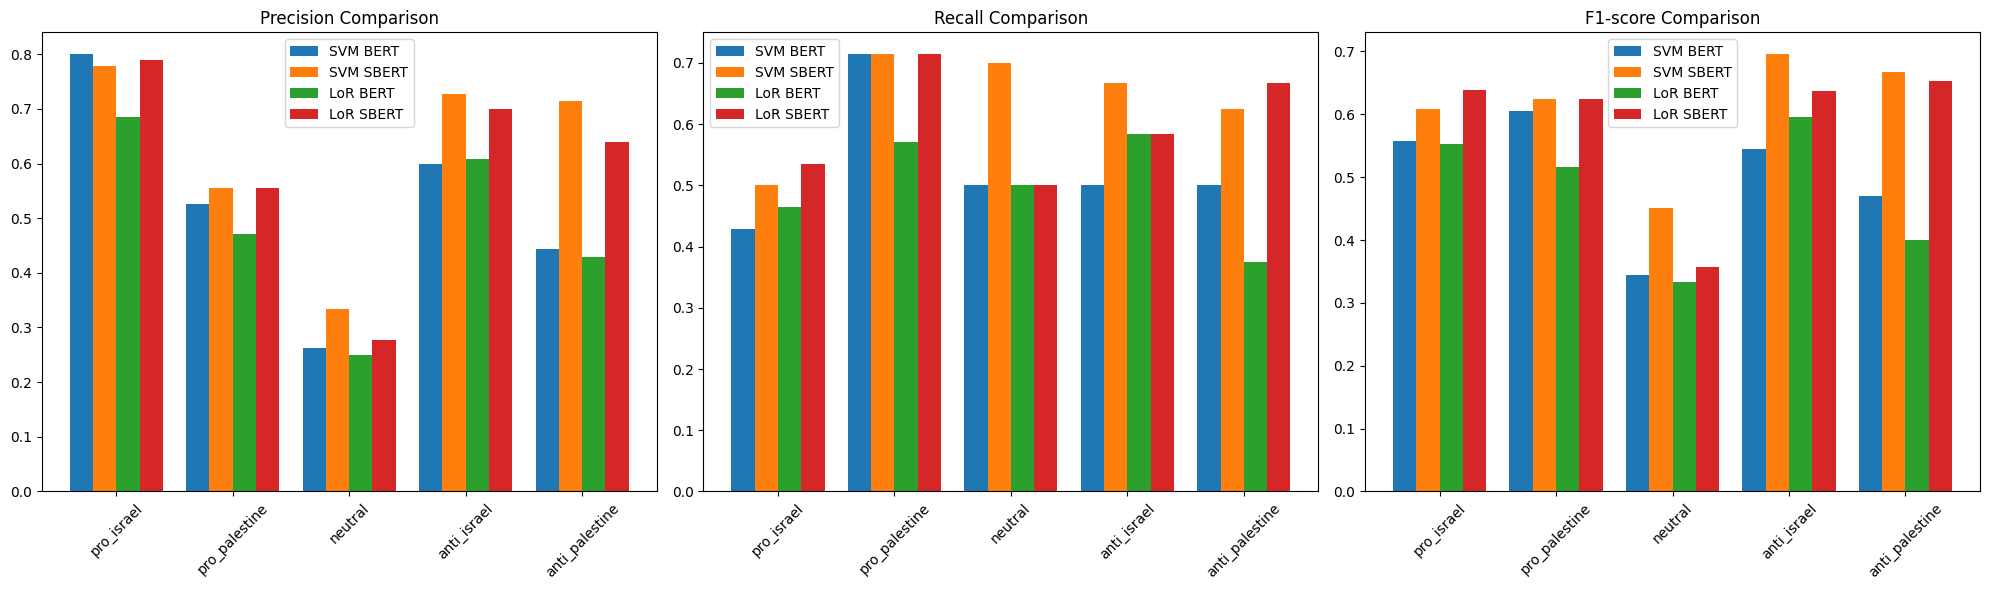

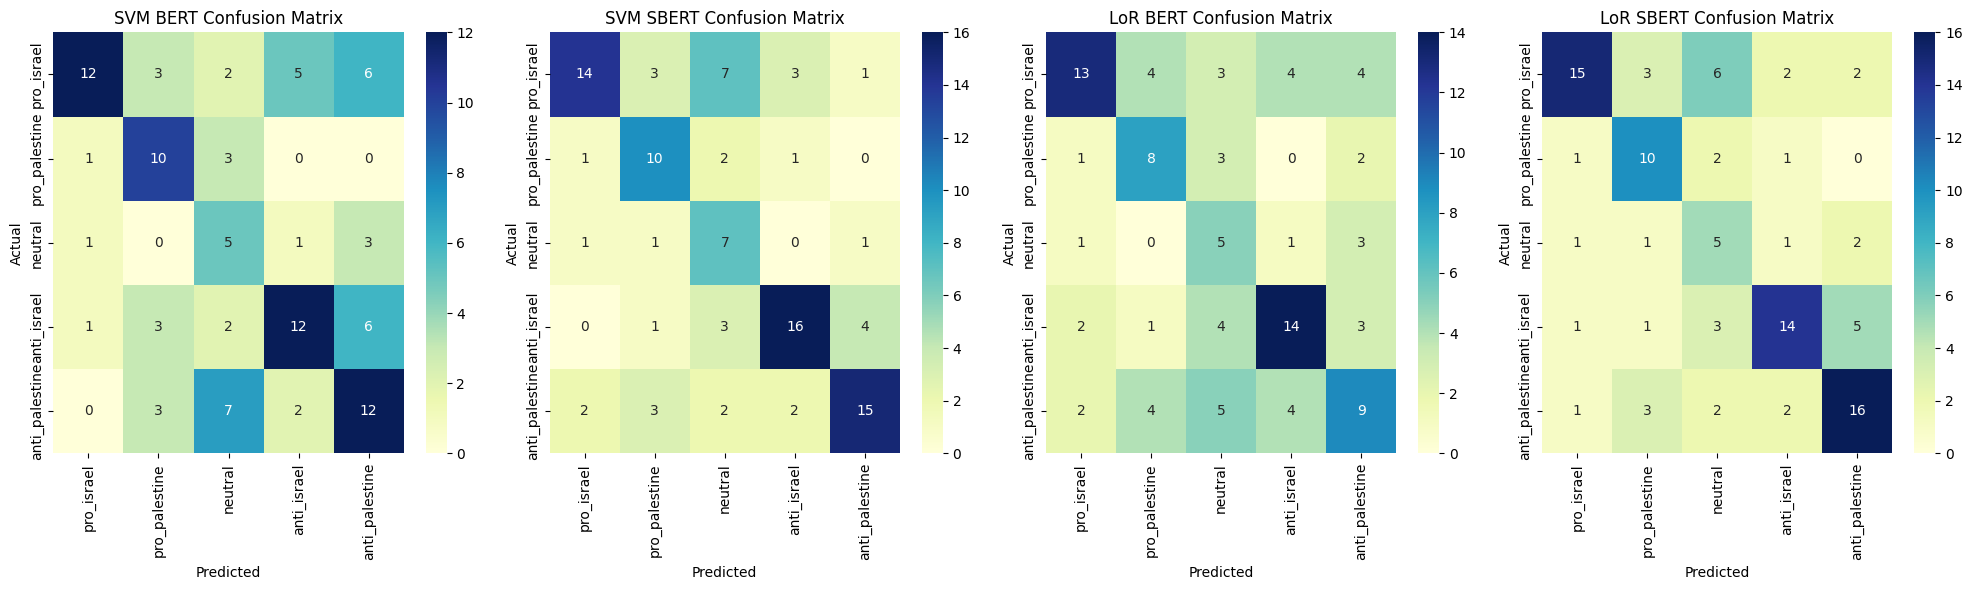

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_metrics_comparison(models_reports, model_names, class_names):
    metrics = ['precision', 'recall', 'f1-score']
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, metric in enumerate(metrics):
        x = np.arange(len(class_names))
        width = 0.2

        for j, report in enumerate(models_reports):
            metric_values = [report[cls][metric] for cls in class_names]
            axes[i].bar(x + j*width, metric_values, width, label=model_names[j])

        axes[i].set_title(f'{metric.capitalize()} Comparison')
        axes[i].set_xticks(x + width * (len(model_names) - 1) / 2)
        axes[i].set_xticklabels(class_names, rotation=45)
        axes[i].legend()

    plt.tight_layout()
    plt.savefig('model_metrics_comparison.png')
    plt.show()

def plot_confusion_matrices(cms, model_names, class_names):
    fig, axes = plt.subplots(1, len(cms), figsize=(20, 6))

    for i, (cm, name) in enumerate(zip(cms, model_names)):
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i],
                    cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
        axes[i].set_title(f'{name} Confusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('confusion_matrices.png')
    plt.show()

# Classification report function
def get_classification_report(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    from sklearn.metrics import classification_report
    return classification_report(np.argmax(y_test, axis=1), y_pred,
                                 target_names=class_names, output_dict=True)

# Collect classification reports
svm_bert_report = get_classification_report(best_svm_bert, X_bert_test, y_bert_test, class_names)
svm_sbert_report = get_classification_report(best_svm_sbert, X_sbert_test, y_sbert_test, class_names)
lor_bert_report = get_classification_report(best_lor_bert, X_bert_test, y_bert_test, class_names)
lor_sbert_report = get_classification_report(best_lor_sbert, X_sbert_test, y_sbert_test, class_names)

# Prepare data for plotting
models_reports = [
    svm_bert_report,
    svm_sbert_report,
    lor_bert_report,
    lor_sbert_report
]
model_names = ['SVM BERT', 'SVM SBERT', 'LoR BERT', 'LoR SBERT']

# Compute confusion matrices
cms = [
    confusion_matrix(np.argmax(y_bert_test, axis=1), best_svm_bert.predict(X_bert_test)),
    confusion_matrix(np.argmax(y_sbert_test, axis=1), best_svm_sbert.predict(X_sbert_test)),
    confusion_matrix(np.argmax(y_bert_test, axis=1), best_lor_bert.predict(X_bert_test)),
    confusion_matrix(np.argmax(y_sbert_test, axis=1), best_lor_sbert.predict(X_sbert_test))
]

# Plot metrics and confusion matrices
plot_metrics_comparison(models_reports, model_names, class_names)
plot_confusion_matrices(cms, model_names, class_names)